100%|██████████| 2000/2000 [19:46<00:00,  1.69it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.0847 - loss: 3.7471 - val_accuracy: 0.0175 - val_loss: 3.8461
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.2159 - loss: 2.7961 - val_accuracy: 0.0825 - val_loss: 3.6209
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.3057 - loss: 2.3421 - val_accuracy: 0.0900 - val_loss: 3.3851
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4066 - loss: 2.0452 - val_accuracy: 0.1075 - val_loss: 3.1914
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4503 - loss: 1.8451 - val_accuracy: 0.1775 - val_loss: 2.9312
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5059 - loss: 1.7043 - val_accuracy: 0.1725 - val_loss: 3.0528
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5539 - loss: 1.5561 - val_accuracy: 0.1925 - val_loss: 2.8052
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5548 - loss: 1.4630 - val_accuracy: 0.3000 - v

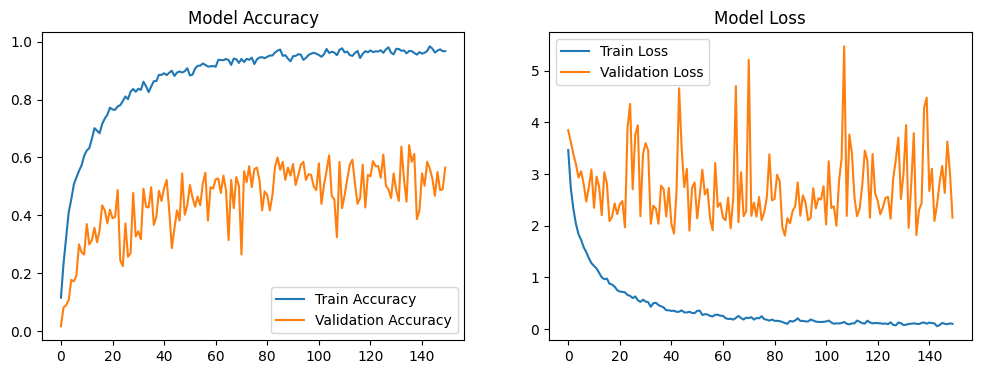

Training Accuracy: 0.9131
Validation Accuracy: 0.5650
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.33      0.50         6
           2       0.75      0.33      0.46         9
           3       0.80      0.62      0.70        13
           4       0.67      0.91      0.77        11
           5       1.00      0.75      0.86        12
           6       0.70      0.58      0.64        12
           7       0.56      0.83      0.67         6
           8       0.55      0.60      0.57        10
           9       0.40      0.33      0.36         6
          10       0.44      0.80      0.57         5
          11       0.64      0.75      0.69        12
          12       0.75      0.33      0.46         9
          13       1.00      0.33      0.50         6
          14       0.17      1.00      0.29         6
          15       0.50      0.36      0.42        14
          16       0.00      0.00      0.00         9
  

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load ESC-50 metadata
esc50_csv_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/meta/esc50.csv"
esc50_audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/audio"

metadata = pd.read_csv(esc50_csv_path)

def extract_features(file_path, sr=22050, n_mels=128, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)
        if len(y) < sr * 0.1:
            print(f"Skipping short audio file: {file_path}")
            return None
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        return mel_spec
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

X, y = [], []
for i in tqdm(range(len(metadata))):
    file_path = os.path.join(esc50_audio_dir, metadata.loc[i, "filename"])
    label = metadata.loc[i, "target"]
    if not os.path.exists(file_path):
        print(f"Skipping missing file: {file_path}")
        continue
    features = extract_features(file_path)
    if features is not None:
        X.append(features)
        y.append(label)

if len(X) == 0:
    raise RuntimeError("No valid audio files were processed. Check dataset paths and file integrity.")

X = np.array(X)
y = to_categorical(y, num_classes=50)
X_resized = np.array([tf.image.resize(np.expand_dims(img, axis=-1), (128, 128)).numpy() for img in X])
X_train, X_test, y_train, y_test = train_test_split(X_resized, y, test_size=0.2, random_state=42)

class ESC50ModelTrainer:
    def __init__(self, input_shape=(128, 128, 1), num_classes=50):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), padding='same', input_shape=self.input_shape))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), padding='same'))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(GlobalAveragePooling2D())
        model.add(Dense(1024))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dense(self.num_classes, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

trainer = ESC50ModelTrainer()
trainer.compile_model()
model = trainer.model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

from sklearn.metrics import classification_report, accuracy_score

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Validation Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute precision, recall, and F1-score
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(50)])

# Print classification report
print("\nClassification Report:\n")
print(report)

# Display Accuracy in classification report for validation dataset
print(f"Final Test Accuracy (from classification report): {accuracy_score(y_true_classes, y_pred_classes):.4f}")


# Save the trained model
model.save("/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/CNN2_LM_esc50_model.h5")
print("Model saved successfully as CNN2_LM_esc50_model.h5")



In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load ESC-50 trained model
CNN2_LM_esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/CNN2_LM_esc50_model.h5"
if not os.path.exists(CNN2_LM_esc50_model_path):
    raise FileNotFoundError(f"ESC-50 trained model not found at: {CNN2_LM_esc50_model_path}")
base_model = load_model(CNN2_LM_esc50_model_path)

# Define new input layer to properly wrap the pre-trained model
input_layer = Input(shape=(128, 128, 1))  # Single-channel input
x = base_model(input_layer, training=False)  # Pass input through pre-trained model
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
out = Dense(10, activation='softmax')(x)  # UrbanSound8K has 10 classes

urban_model = Model(inputs=input_layer, outputs=out)
urban_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load UrbanSound8K dataset
urbansound_csv = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv"
if not os.path.exists(urbansound_csv):
    raise FileNotFoundError(f"UrbanSound8K metadata file not found at: {urbansound_csv}")

urbandata = pd.read_csv(urbansound_csv)
audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio"

# Function to Extract Features (Mel Spectrogram Only)
def extract_features(file_path, sr=22050, n_mels=128, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)
        if len(y) < sr * 0.1 or np.sum(y) == 0:
            print(f"Skipping silent or short audio file: {file_path}")
            return None

        # Compute Mel Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        # Resize Mel Spectrogram to (128,128)
        mel_spec_resized = tf.image.resize(np.expand_dims(mel_spec, axis=-1), target_size).numpy()

        # Ensure final shape is (128, 128, 1)
        return mel_spec_resized
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Process UrbanSound8K Audio Files
X_urban, y_urban = [], []

print("Processing UrbanSound8K dataset...")

for _, row in tqdm(urbandata.iterrows(), total=len(urbandata)):
    file_path = os.path.join(audio_dir, f"fold{row['fold']}", row['slice_file_name'])
    label = row['classID']

    if not os.path.exists(file_path):
        print(f"Skipping missing file: {file_path}")
        continue

    features = extract_features(file_path)

    if features is not None:
        X_urban.append(features)
        y_urban.append(label)

if len(X_urban) == 0:
    raise RuntimeError("No valid audio files were processed. Check dataset paths and file integrity.")

# Convert to NumPy arrays safely
X_urban = np.asarray(X_urban)
y_urban = to_categorical(y_urban, num_classes=10)

print(f"Dataset successfully processed! {X_urban.shape[0]} samples available.")

# Ensure dataset splitting happens correctly
if len(X_urban) > 0:
    X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)
    print(f"Training set: {X_train_urban.shape}, Test set: {X_test_urban.shape}")

    # Train modified model on UrbanSound8K
    history = urban_model.fit(X_train_urban, y_train_urban, validation_data=(X_test_urban, y_test_urban), epochs=50, batch_size=32)

    # Save the fine-tuned model
    urban_model.save("/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/urbansound8k_model.h5")
    print("Fine-tuned model saved successfully as urbansound8k_model.h5")
else:
    print("No valid training data available. Check feature extraction.")


Processing UrbanSound8K dataset...


 24%|██▍       | 2123/8732 [14:19<26:29,  4.16it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold3/151359-1-2-0.wav


 41%|████      | 3556/8732 [23:41<25:27,  3.39it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold2/17307-1-0-0.wav


 95%|█████████▌| 8327/8732 [54:08<02:05,  3.23it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-1-0.wav


 95%|█████████▌| 8328/8732 [54:08<01:52,  3.60it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-2-0.wav


 95%|█████████▌| 8329/8732 [54:08<01:44,  3.85it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-3-0.wav


 95%|█████████▌| 8330/8732 [54:08<01:43,  3.89it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-4-0.wav


100%|██████████| 8732/8732 [56:30<00:00,  2.58it/s]


Dataset successfully processed! 8726 samples available.
Training set: (6980, 128, 128, 1), Test set: (1746, 128, 128, 1)
Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 216s 953ms/step - accuracy: 0.2079 - loss: 2.4066 - val_accuracy: 0.4507 - val_loss: 2.1118
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 261s 956ms/step - accuracy: 0.5007 - loss: 1.5390 - val_accuracy: 0.5876 - val_loss: 1.6409
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 262s 958ms/step - accuracy: 0.5901 - loss: 1.3100 - val_accuracy: 0.6369 - val_loss: 1.2114
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 261s 952ms/step - accuracy: 0.6352 - loss: 1.1845 - val_accuracy: 0.6186 - val_loss: 1.2007
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.6629 - loss: 1.0874 - val_accuracy: 0.6529 - val_loss: 1.0620
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 206s 941ms/step - accuracy: 0.6709 - loss: 1.0579 - val_accuracy: 0.7136 - val_loss: 0.9085
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 209s 954ms/step - accuracy: 0.6955 - loss: 0.9709 

Fine-tuned model saved successfully as urbansound8k_model.h5


Training Accuracy: 0.9054
Test Accuracy: 0.8545
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step
Precision: 0.8599
Recall: 0.8545
F1 Score: 0.8541


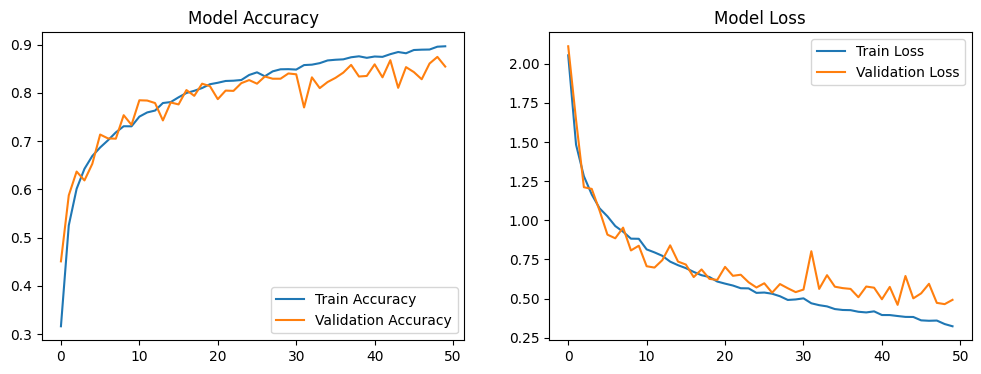

y_true_classes: <class 'numpy.ndarray'> (1746,)
y_pred_classes: <class 'numpy.ndarray'> (1746,)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       215
           1       0.96      0.86      0.91        79
           2       0.81      0.70      0.75       178
           3       0.91      0.78      0.84       209
           4       0.79      0.90      0.84       212
           5       0.87      0.92      0.89       204
           6       0.98      0.94      0.96        68
           7       0.86      0.93      0.90       191
           8       0.90      0.84      0.87       170
           9       0.76      0.91      0.83       220

    accuracy                           0.85      1746
   macro avg       0.88      0.86      0.86      1746
weighted avg       0.86      0.85      0.85      1746

Final Test Accuracy (from classification report): 0.8545


In [ ]:
# Evaluate model on training data
train_loss, train_accuracy = urban_model.evaluate(X_train_urban, y_train_urban, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on test data
test_loss, test_accuracy = urban_model.evaluate(X_test_urban, y_test_urban, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_probs = urban_model.predict(X_test_urban)  # Get probability outputs
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_urban, axis=1)  # Convert one-hot encoded labels to class labels


from sklearn.metrics import precision_score, recall_score, f1_score


# Compute precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


# Ensure the import is available
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Debugging step: Check class labels before computing classification report
print("y_true_classes:", type(y_true_classes), y_true_classes.shape)
print("y_pred_classes:", type(y_pred_classes), y_pred_classes.shape)

# Compute classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

print("\nClassification Report:\n")
print(report)
print(f"Final Test Accuracy (from classification report): {accuracy_score(y_true_classes, y_pred_classes):.4f}")



Processing UrbanSound8K dataset...


 24%|██▍       | 2123/8732 [14:39<41:29,  2.66it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold3/151359-1-2-0.wav


 41%|████      | 3556/8732 [25:08<24:25,  3.53it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold2/17307-1-0-0.wav


 95%|█████████▌| 8327/8732 [1:00:43<02:07,  3.18it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-1-0.wav


 95%|█████████▌| 8329/8732 [1:00:43<01:43,  3.88it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-2-0.wav
Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-3-0.wav


 95%|█████████▌| 8330/8732 [1:00:44<01:42,  3.93it/s]

Skipping silent or short audio file: /content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio/fold1/87275-1-4-0.wav


100%|██████████| 8732/8732 [1:03:17<00:00,  2.30it/s]


Dataset successfully processed! 8726 samples available.
Training set: (6980, 128, 128, 1), Test set: (1746, 128, 128, 1)
Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.2163 - loss: 2.2683 - val_accuracy: 0.4708 - val_loss: 2.1109
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.5092 - loss: 1.4747 - val_accuracy: 0.5813 - val_loss: 1.6120
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.5776 - loss: 1.2843 - val_accuracy: 0.6266 - val_loss: 1.1756
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.6213 - loss: 1.1852 - val_accuracy: 0.6678 - val_loss: 1.0328
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.6459 - loss: 1.1095 - val_accuracy: 0.6649 - val_loss: 1.0356
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.6589 - loss: 1.0739 - val_accuracy: 0.6890 - val_loss: 0.9606
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.6886 - loss: 1.0004 - val_accuracy: 0.

Fine-tuned model saved successfully as urbansound8k_model.h5
Training Accuracy: 0.9117
Test Accuracy: 0.8603
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 260ms/step
Precision: 0.8637
Recall: 0.8603
F1 Score: 0.8601


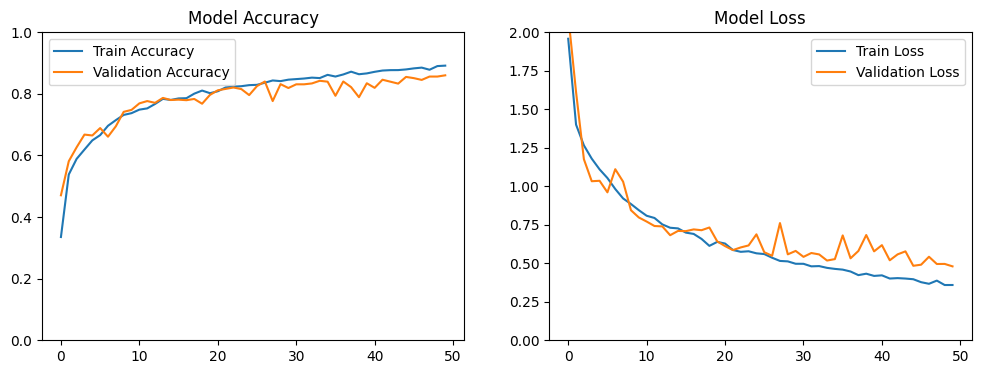

y_true_classes: <class 'numpy.ndarray'> (1746,)
y_pred_classes: <class 'numpy.ndarray'> (1746,)

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       215
           1       0.87      0.90      0.88        79
           2       0.81      0.73      0.77       178
           3       0.90      0.81      0.85       209
           4       0.80      0.89      0.84       212
           5       0.89      0.87      0.88       204
           6       1.00      0.93      0.96        68
           7       0.87      0.91      0.89       191
           8       0.95      0.83      0.88       170
           9       0.86      0.86      0.86       220

    accuracy                           0.86      1746
   macro avg       0.87      0.86      0.87      1746
weighted avg       0.86      0.86      0.86      1746

Final Test Accuracy (from classification report): 0.8603
Training history saved as .npy files.


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Load ESC-50 trained model
CNN2_LM_esc50_model_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/ESC-50-master/CNN2_LM_esc50_model.h5"
if not os.path.exists(CNN2_LM_esc50_model_path):
    raise FileNotFoundError(f"ESC-50 trained model not found at: {CNN2_LM_esc50_model_path}")
base_model = load_model(CNN2_LM_esc50_model_path)

# Define new input layer to properly wrap the pre-trained model
input_layer = Input(shape=(128, 128, 1))  # Single-channel input
x = base_model(input_layer, training=False)  # Pass input through pre-trained model
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
out = Dense(10, activation='softmax')(x)  # UrbanSound8K has 10 classes

urban_model = Model(inputs=input_layer, outputs=out)
urban_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load UrbanSound8K dataset
urbansound_csv = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv"
if not os.path.exists(urbansound_csv):
    raise FileNotFoundError(f"UrbanSound8K metadata file not found at: {urbansound_csv}")

urbandata = pd.read_csv(urbansound_csv)
audio_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/UrbanSound8K/audio"

# Function to Extract Features (Mel Spectrogram Only)
def extract_features(file_path, sr=22050, n_mels=128, target_size=(128, 128)):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    try:
        y, sr = librosa.load(file_path, sr=sr, duration=3.0)
        if len(y) < sr * 0.1 or np.sum(y) == 0:
            print(f"Skipping silent or short audio file: {file_path}")
            return None

        # Compute Mel Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        # Resize Mel Spectrogram to (128,128)
        mel_spec_resized = tf.image.resize(np.expand_dims(mel_spec, axis=-1), target_size).numpy()

        # Ensure final shape is (128, 128, 1)
        return mel_spec_resized
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Process UrbanSound8K Audio Files
X_urban, y_urban = [], []

print("Processing UrbanSound8K dataset...")

for _, row in tqdm(urbandata.iterrows(), total=len(urbandata)):
    file_path = os.path.join(audio_dir, f"fold{row['fold']}", row['slice_file_name'])
    label = row['classID']

    if not os.path.exists(file_path):
        print(f"Skipping missing file: {file_path}")
        continue

    features = extract_features(file_path)

    if features is not None:
        X_urban.append(features)
        y_urban.append(label)

if len(X_urban) == 0:
    raise RuntimeError("No valid audio files were processed. Check dataset paths and file integrity.")

# Convert to NumPy arrays safely
X_urban = np.asarray(X_urban)
y_urban = to_categorical(y_urban, num_classes=10)

print(f"Dataset successfully processed! {X_urban.shape[0]} samples available.")

# Ensure dataset splitting happens correctly
if len(X_urban) > 0:
    X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)
    print(f"Training set: {X_train_urban.shape}, Test set: {X_test_urban.shape}")

    # Train modified model on UrbanSound8K
    history = urban_model.fit(X_train_urban, y_train_urban, validation_data=(X_test_urban, y_test_urban), epochs=50, batch_size=32)

    # Save the fine-tuned model
    urban_model.save("/content/drive/MyDrive/Colab Notebooks/Dataset/UrbanSound8K/urbansound8k_model.h5")
    print("Fine-tuned model saved successfully as urbansound8k_model.h5")
else:
    print("No valid training data available. Check feature extraction.")



# Evaluate model on training data
train_loss, train_accuracy = urban_model.evaluate(X_train_urban, y_train_urban, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on test data
test_loss, test_accuracy = urban_model.evaluate(X_test_urban, y_test_urban, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_probs = urban_model.predict(X_test_urban)  # Get probability outputs
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_urban, axis=1)  # Convert one-hot encoded labels to class labels


from sklearn.metrics import precision_score, recall_score, f1_score


# Compute precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.ylim(0, 1)  # Set y-axis range for accuracy
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylim(0, 2)  # Set y-axis range for loss
plt.title('Model Loss')

plt.show()

# Ensure the import is available
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Debugging step: Check class labels before computing classification report
print("y_true_classes:", type(y_true_classes), y_true_classes.shape)
print("y_pred_classes:", type(y_pred_classes), y_pred_classes.shape)

# Compute classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

print("\nClassification Report:\n")
print(report)
print(f"Final Test Accuracy (from classification report): {accuracy_score(y_true_classes, y_pred_classes):.4f}")



# Save training history to .npy files
np.save("cnn2_train_acc.npy", np.array(history.history['accuracy']))
np.save("cnn2_val_acc.npy",   np.array(history.history['val_accuracy']))
np.save("cnn2_train_loss.npy", np.array(history.history['loss']))
np.save("cnn2_val_loss.npy",   np.array(history.history['val_loss']))


print("Training history saved as .npy files.")



In [ ]:
# SAVE CNN2 HISTORY AFTER TRAINING
import numpy as np

np.save("/content/drive/MyDrive/Colab Notebooks/Models/Result/cnn2_LM_train_acc.npy", history.history['accuracy'])
np.save("/content/drive/MyDrive/Colab Notebooks/Models/Result/cnn2_LM_val_acc.npy", history.history['val_accuracy'])
np.save("/content/drive/MyDrive/Colab Notebooks/Models/Result/cnn2_LM_train_loss.npy", history.history['loss'])
np.save("/content/drive/MyDrive/Colab Notebooks/Models/Result/cnn2_LM_val_loss.npy", history.history['val_loss'])

print("CNN2 training history saved!")


CNN1 training history saved!
